# Project Description
## Meekness Anyaeche
### Introduction
    The stock market, equity market or share market is the aggregation of buyers and sellers of stocks, which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Predicting the stock market has always been one of the most difficult tasks undertaken by humans. My project seeks to find procedures of predicting the stocks, and eventually, to predict them using Machine learning. Machine learning is a data analysis technique that learns from experience using computational data to learn information directly from data without relying on a predetermined equation. These algorithms find patterns in market data that generate insight to make better and smarter decisions on stocks.
### Features
	This project will contain various ways and tools that will help in determining how machine learning is of great importance in the market world. Features such as KNN-classifiers, tree classifiers, cross validation, dummy classifiers, decision trees and so on. These features will be used and explained extensively in this project to practically depict their own predictions of the market. 
### Obtaining Data
    In this project, I’ll dive into the various models used, then proceeding to predict the markets. Using various techniques like classification technique or regression technique. The data for this project will be obtained from API’s from Yahoo and will cover features from various categories of technical indicators, futures contracts, price of commodities, important indices of markets around the world, price of major companies in the U.S. market, and treasury bill rates

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
!pip install matplotlib-venn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, svm
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Using LSTM Model

In [7]:
#Getting the stock quote. Which for this project, is from Microsoft 
df = web.DataReader('MSFT', data_source='yahoo', start='2015-01-01', end='2019-12-31')
df #print the data  

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.269192
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,40.889698
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.289536
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,40.801445
2015-01-08,47.750000,46.720001,46.750000,47.590000,29645200.0,42.001747
...,...,...,...,...,...,...
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,154.718262
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,155.986435
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,156.271561


In [8]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,81.698490,80.342345,81.052250,81.066089,2.912099e+07,76.984421
std,32.266854,31.781196,32.073285,32.046253,1.396202e+07,32.638121
min,40.740002,39.720001,40.340000,40.290001,7.425600e+06,35.656021
25%,53.990002,52.930000,53.495000,53.517499,2.068352e+07,48.689938
50%,71.494999,70.294998,70.865002,71.010002,2.594710e+07,66.926777
75%,107.484999,105.082500,106.307499,106.252497,3.333992e+07,102.783342
max,159.550003,158.220001,159.449997,158.960007,1.691640e+08,156.271561


#### Opening Prices

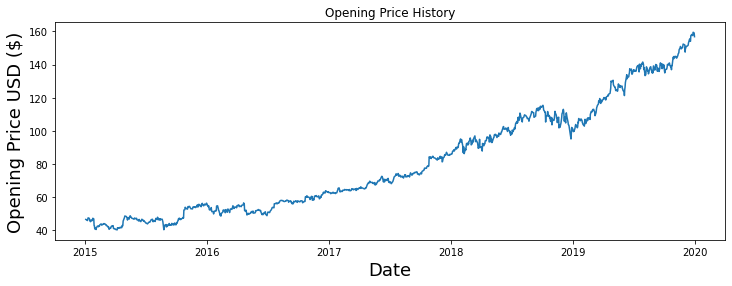

In [9]:
#visualizing the opening price history 
plt.figure(figsize=(12,4))
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18, color ='black')
plt.ylabel('Opening Price USD ($)', fontsize=18, color='black')
plt.title('Opening Price History')
plt.show()

#### Closing Prices

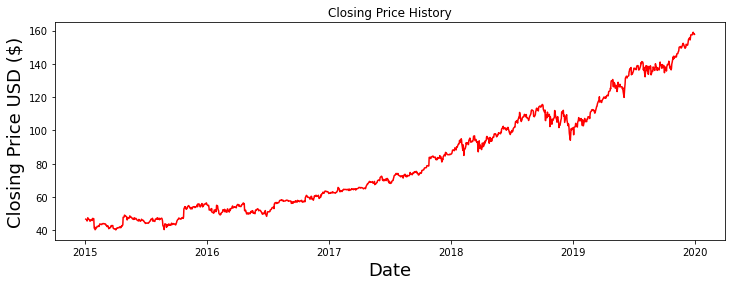

In [10]:
#Visualizing the closing price history 
plt.figure(figsize=(12,4))
plt.plot(df['Close'], color = 'red')
plt.xlabel('Date', fontsize=18, color ='black')
plt.ylabel('Closing Price USD ($)', fontsize=18, color='black')
plt.title('Closing Price History')
plt.show()

In [11]:
#Lets predict the Closing Price 
data = df.filter(['Close'])
len_trainingdata = math.ceil(len(df) * .8)
print(len_trainingdata)

msft = data.values #convert to dataset and scale
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(msft)
scaled_data

1007


array([[0.05452092],
       [0.05089745],
       [0.04516727],
       ...,
       [1.        ],
       [0.98845529],
       [0.98938224]])

In [12]:
train_data = scaled_data[0:len_trainingdata, :]
#spliting the data
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.05452092, 0.05089745, 0.04516727, 0.05005476, 0.06151512,
       0.05814441, 0.05317264, 0.05115024, 0.04777954, 0.04373471,
       0.05013905, 0.05140304, 0.04744246, 0.05763883, 0.05806016,
       0.0566276 , 0.01997134, 0.00758404, 0.01449395, 0.00092695,
       0.00834244, 0.01103899, 0.01306142, 0.01820173, 0.01786466,
       0.01744333, 0.01946572, 0.01761187, 0.02359484, 0.03016767,
       0.02772395, 0.02730258, 0.02704979, 0.03008342, 0.03252718,
       0.03202156, 0.0311789 , 0.03176877, 0.02999914, 0.03025196,
       0.0251959 , 0.02334204, 0.02376337, 0.01744333, 0.02157241,
       0.01466249, 0.01424116, 0.00615151, 0.00918514, 0.01070195,
       0.01188169, 0.01862306, 0.01685346, 0.02182523, 0.02165669,
       0.02199377, 0.00985926, 0.00775258, 0.00573018, 0.00564589])]
[0.003117880793850447]

[array([0.05452092, 0.05089745, 0.04516727, 0.05005476, 0.06151512,
       0.05814441, 0.05317264, 0.05115024, 0.04777954, 0.04373471,
       0.05013905, 0.05140304, 0.0

In [13]:
x_train, y_train = np.array(x_train), np.array(y_train) #convert both arrays to numpy
#LSTM MODEL
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(947, 60, 1)

#### Build LSTM Model

In [14]:
#BUILD LSTM MODEL
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error') #Compile

In [16]:
model.fit(x_train, y_train, batch_size=1, epochs=1) #Train

947/947 [==============================] - 22s 21ms/step - loss: 0.0011


In [18]:
#create testing dataset
test_data = scaled_data[len_trainingdata-60: , :]
x_test = []
y_test = msft[len_trainingdata: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert testing data to numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
x_train.shape 

In [ ]:
#Get the predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the RMSE
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

### Prediction

In [ ]:
#Plot the data
train = data[:len_trainingdata]
valid = data[len_trainingdata:]
valid['Predictions'] = predictions
#Get the plot
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=18, color ='black')
plt.ylabel('Closing Price USD ($)', fontsize=18, color='black')
plt.title('Model')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show valid and predictions
valid

# Using Classifications

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, 3]

In [ ]:
#test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size=0.2)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]


for item in classifiers:
    print(item)
    clf = item
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
y_pred = clf.predict(x_test)

# Using Linear Regression 
## Data is for APPLE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#New stock recod for apple
df2 = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2019-12-31')
df2 #prints out

In [ ]:
df2.describe()

In [ ]:
x = df2[['High', 'Low', 'Open', 'Volume']].values
y = df2['Close'].values

In [ ]:
#test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [ ]:
regressor = linear_model.LinearRegression()

In [ ]:
#Fit
regressor.fit(x_train, y_train)

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

In [ ]:
#Predict
predicted = regressor.predict(x_test)
predicted

In [ ]:
dframe = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predicted.flatten()})
dframe.head(100) #First 100 data 

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

In [ ]:
#Graph of the first 30 data items
graph = dframe.head(30)
graph.plot(kind='line')
graph.plot(kind='bar')

In [ ]:
def regression_residuals(ax, predicted, actual, 
                         show_errors=None, right=False):
    ''' figsize -> subplots; 
        predicted/actual data -> columns of a DataFrame
        errors -> "all" or sequence of indices '''
    df = pd.DataFrame({'actual':actual, 
                       'predicted':predicted})
    df['error'] = df.actual - df.predicted
    ax.plot(df.predicted, df.error, '.')
    ax.plot(df.predicted, np.zeros_like(predicted), '-')
    
    if right:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
    
    ax.set_xlabel('Predicted Value')
    ax.set_ylabel('Residual')
    
    if show_errors == 'all':
        show_errors = range(len(df))
    if show_errors:
        preds = df.predicted.iloc[show_errors]
        errors = df.error.iloc[show_errors]
        ax.vlines(preds, 0, errors, 'r')

In [ ]:
knn = KNeighborsRegressor()

models = [regressor, knn]

fig, axes = plt.subplots(1, 2, figsize=(10,5), 
                         sharex=True, sharey=True)
fig.tight_layout()

for model, ax, on_right in zip(models, axes, [False, True]):
    preds = (model.fit(x_train, y_train)
                  .predict(x_test))
    
    regression_residuals(ax, preds, y_test, [-20], on_right)

axes[0].set_title('Linear Regression Residuals')
axes[1].set_title('kNN-Regressor Rediduals');

In [ ]:
def rms_error(actual, predicted):
    ' root-mean-squared-error function '
    # lesser values are better (a<b ... a is better)
    mse = metrics.mean_squared_error(actual, predicted)    
    return np.sqrt(mse)

def neg_rmse_score(actual, predicted):
    ' rmse based score function '
    #  greater values are better  (a<b ... b better)
    return -rms_error(actual, predicted)

def neg_rmse_scorer(mod, ftrs, tgt_actual):
    ' rmse scorer suitable for scoring arg '
    tgt_pred = mod.predict(ftrs)
    return neg_rmse_score(tgt_actual, tgt_pred)

## Pipeline, KNN Regressor

In [ ]:
scaler = StandardScaler()

regressor  = linear_model.LinearRegression()
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_10 =  KNeighborsRegressor(n_neighbors=10)

std_r_pipe  = make_pipeline(scaler, regressor)
std_knn3_pipe  = make_pipeline(scaler, knn_3)
std_knn10_pipe  = make_pipeline(scaler, knn_10)

# mean with/without Standardization should give same results
regressors = {'baseline'  : DummyRegressor(strategy='mean'),
              'std_knn3'  : std_knn3_pipe,
              'std_knn10' : std_knn10_pipe,
              'std_r'    : std_r_pipe}

msrs = {'MAE'  : metrics.make_scorer(metrics.mean_absolute_error),
        'RMSE' : metrics.make_scorer(rms_error)}

fig, axes = plt.subplots(2, 1, figsize=(6,4))
fig.tight_layout()
for mod_name, model in regressors.items():
    cv_results = cross_validate(model, x_test, y_test, scoring = msrs, cv=10)
    for ax, msr in zip(axes, msrs):
        msr_results = cv_results["test_" + msr]
        my_lbl = "{:12s} {:.3f} {:.2f}".format(mod_name, 
                                               msr_results.mean(), 
                                               msr_results.std())
        ax.plot(msr_results, 'o--', label=my_lbl)
        ax.set_title(msr)
        # ax.legend() # uncomment for summary stats

# Feature Construction and Selection

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size=0.2)
print(df.Close)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
f_temps = np.linspace(0, 212, 100)
c_temps = (5/9) * (f_temps - 32)
plt.plot(f_temps, f_temps, 'r',  # F -> F
         f_temps, c_temps, 'b');

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
original = np.random.uniform(-5, 5, 100)
scaled = StandardScaler().fit_transform(original.reshape(-1,1))[:,0]
bins = np.floor(original).astype(np.uint8) + 5

df = pd.DataFrame({'original':original,
                   'scaled':scaled,
                   'hue':bins})
df = pd.melt(df, id_vars='hue', var_name='scale')

sns.swarmplot(x='scale', y='value', hue='hue', data=df).legend_.remove()